In [195]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from PIL import Image

imageSet = 's5'

In [196]:
# Load all the images of specific set
def load_images(path):
    images = []
    for file in os.listdir(path):
        img = Image.open(os.path.join(path, file)).convert('L')  #L -Luinance(balck and white)
        images.append(np.array(img)) # Converting images to 2d array 
    return np.array(images)

In [211]:
faces = load_images('./Data/Dataset/att_faces/'+imageSet)
print("Dataset shape:", faces.shape)
print(f'face = {faces}')

Dataset shape: (10, 112, 92)
face = [[[133 132 131 ... 124 123 120]
  [133 130 130 ... 123 123 123]
  [131 132 130 ... 123 122 125]
  ...
  [105  99 106 ...  52  53  55]
  [106 101 107 ...  51  54  52]
  [108 112 116 ...  53  48  58]]

 [[124 125 125 ... 125 124 125]
  [126 126 126 ... 127 122 123]
  [126 126 126 ... 126 124 126]
  ...
  [ 80  86  84 ...  89  85  88]
  [ 86  83  82 ...  89  88  88]
  [ 89  81  82 ...  84  89  85]]

 [[130 132 129 ... 119 123 124]
  [132 134 131 ... 121 121 118]
  [132 131 129 ... 121 123 123]
  ...
  [106 106 111 ...  56  49  52]
  [114 116 130 ...  54  50  54]
  [109 125 129 ...  53  50  52]]

 ...

 [[131 133 128 ... 124 122 126]
  [130 133 131 ... 121 123 124]
  [130 134 130 ... 122 121 121]
  ...
  [104 104 102 ...  55  50  57]
  [104 102 107 ...  57  52  59]
  [111 113 117 ...  54  53  56]]

 [[132 127 128 ... 127 124 125]
  [129 126 129 ... 124 127 126]
  [129 128 125 ... 125 127 128]
  ...
  [118  86  96 ...  89  86  84]
  [122  81  97 ...  85  

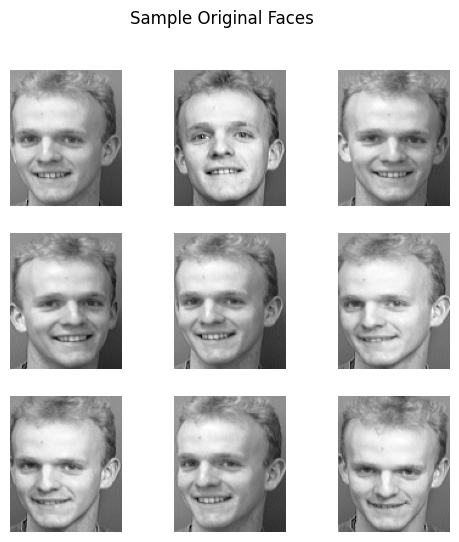

In [198]:
plt.figure(figsize=(6,6))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(faces[i], cmap='gray')
    plt.axis('off')
plt.suptitle('Sample Original Faces')
plt.show()

In [199]:
#  Converting images into vectors 
# X - row : Each data/image, 
# X - col : different pixel values of subject in different data
n_samples, h, w = faces.shape
X = faces.reshape(n_samples, h * w)
print("Data matrix shape:", X.shape)

Data matrix shape: (10, 10304)


In [200]:
# PCA - Mean centering
mean_face = np.mean(X, axis = 0)    # axis = 0 -> operate coloumn-wise : take the mean of each pixel across all images
X_centered = X - mean_face          # Determine deviance of each pixel value from the mean (Eg: 133 - 129.3 = 3.7)
# print(f'Mean face = {mean_face}')
# print(f'X = {X}')
# print(f'X_centered = {X_centered}')

In [201]:
# Applying SVD 
    # Vt = eigenfaces
    # S = singular values
    # Eigenvalues = S^2/(n-1)
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# print(f'U = {U}')
# print(f'S = {S}')
# print(f'Vt = {Vt}')

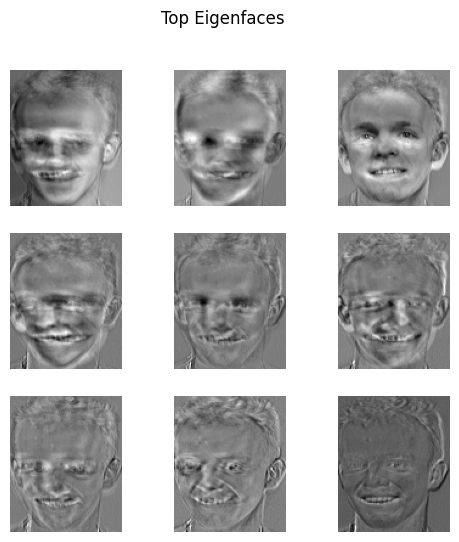

In [202]:
# Visualize eigenfaces
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(Vt[i].reshape(h, w), cmap='gray')
    plt.axis('off')
plt.suptitle("Top Eigenfaces")
plt.show()

In [203]:
# Reconstruction function the face

def reconstruct_image(x, mean, Vt, k):
    return mean + x @ Vt[:k].T @ Vt[:k]


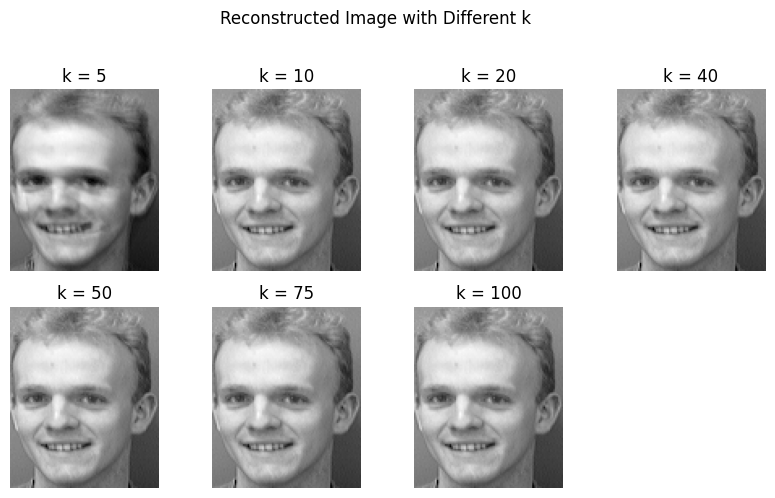

In [204]:
# Comparing the different k values 
k_values = [5, 10, 20, 40, 50, 75, 100]

img_index = 0
plt.figure(figsize=(10,8))

for i, k in enumerate(k_values):
    recon = reconstruct_image(X_centered[img_index], mean_face, Vt, k)
    plt.subplot(3,4,i+1)
    plt.imshow(recon.reshape(h,w), cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

plt.suptitle("Reconstructed Image with Different k")
plt.show()


# Analysis
<ol>
    <li> Compression Ratio 
        <ul>
            <li> Defined by :
                Compression Ratio= Compressed storage / Original storage​
            <li> Higher ration -> better compression
            <li> Trade-off with image quality 
        </ul>
    <li> Mean Squared Error (MSE)
        <ul>
            <li> Measures how much information is lost during reconstruction
            <li> Lower MSE → better reconstruction
            <li> MSE decreases as k increases
        </ul>
</ol>




In [205]:
# Function to compute MSE and Compression ratio
data = faces.shape
N = data[1]
d = data[2]

def compute_mse(original, reconstruct_image):
    return np.mean((original - reconstruct_image)**2)

def compute_compression_ratio(k):
    original_size = N*d
    compressed_size = k*(N+d+1)
    return original_size / compressed_size

In [206]:
def pca_reconstruct(U, S, Vt, mean_image, k):
    """
    Reconstructs image using first k PCA components.
    """
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    Vk = Vt[:k, :]

    X_reconstructed = Uk @ Sk @ Vk + mean_image
    return X_reconstructed

In [210]:
# Compute metric for different k
mse_values = [] 
compression_ratios = []
X_Original = X

for k in k_values:
    recon = pca_reconstruct(U, S, Vt, mean_face, k)
    mse = compute_mse(X_Original, recon)
    cr = compute_compression_ratio(k)

    mse_values.append(mse)
    compression_ratios.append(cr)

print(f'Mse Values are: {mse_values}')
print(f'Compress ratios = {compression_ratios}')

Mse Values are: [np.float64(57.58725166730418), np.float64(2.503691763241552e-27), np.float64(2.503691763241552e-27), np.float64(2.503691763241552e-27), np.float64(2.503691763241552e-27), np.float64(2.503691763241552e-27), np.float64(2.503691763241552e-27)]
Compress ratios = [10.052682926829268, 5.026341463414634, 2.513170731707317, 1.2565853658536585, 1.0052682926829268, 0.6701788617886179, 0.5026341463414634]


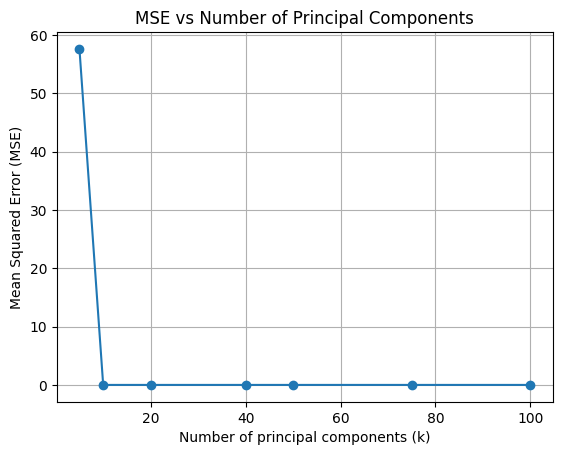

In [208]:
# MSE Vs Number of Components k

plt.figure()
plt.plot(k_values, mse_values, marker='o')
plt.xlabel("Number of principal components (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs Number of Principal Components")
plt.grid(True)
plt.show()


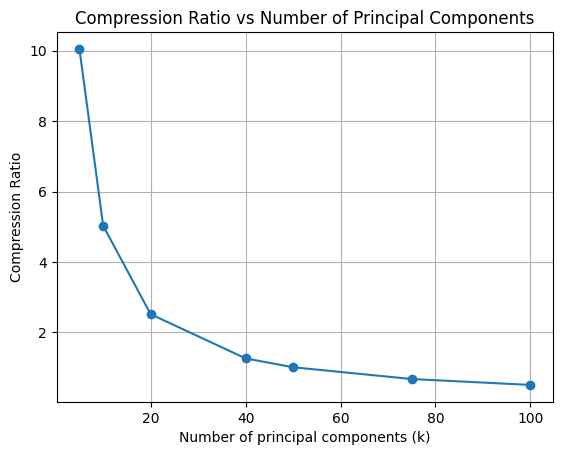

In [209]:
# Compression Ratio vs Number of Components 𝑘
plt.figure()
plt.plot(k_values, compression_ratios, marker='o')
plt.xlabel("Number of principal components (k)")
plt.ylabel("Compression Ratio")
plt.title("Compression Ratio vs Number of Principal Components")
plt.grid(True)
plt.show()
